## 11주차 과제_0516(금)

딥러닝 파이토치 교과서 ch5. 1p.166~179

# 5.1 합성곱 신경망

딥러닝 역전파

순전파 과정에 따라 계산된 오차 정보가 신경망의 모든 노느(출력층 $\rightarrow$ 은닉층 $\rightarrow$ 입력층)으로 전송됨

이러한 계산 과정은 복잡하고 많은 자원(CPU, GPU, 메모리)을 요구함

$\hookrightarrow$ 합성곱 신경망을 이용해 문제 해결

## 5.1.1 합성곱층의 필요성

이미지나 영상 처리에 유용

이미지 분석은 nxn 배열을 펼쳐서(flattenging) 각 픽셀에 가중치를 곱하여 은닉층으로 전달함. 이 때 데이터의 공간적 구조가 무시되는데 이를 방지하기 위해 홥성곱층을 사용함

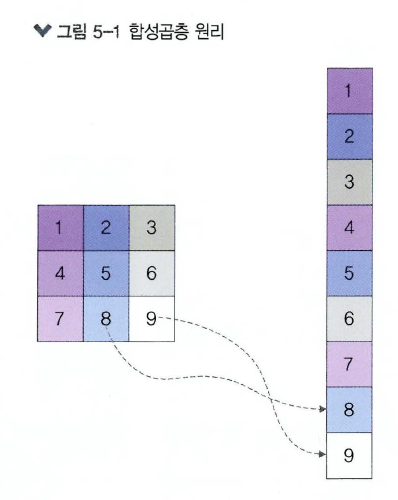

## 5.1.2 합성곱 신경망 구조

**합성곱 신경망**

음석 인식이나 이미지/영상 인식에서 주로 사용되는 신경망

다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있음

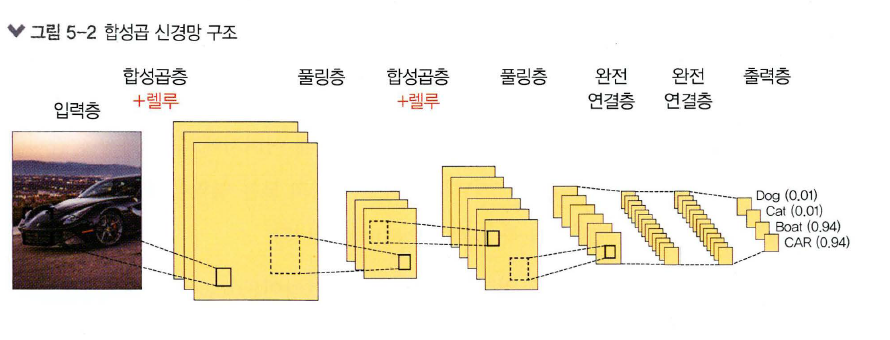

합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터를 추출함

그 후 추출된 주요 특성 벡터들은 완전 연결층을 거치면서 1차원 벡터로 변환되며 마지막으로 출력층에서 활성화 함수인 소프트맥스 함수를 사용하여 최종 결과가 출력됨

**입력층**

입력 이미지 데이터가 최초로 거치게 되는 계층

높이(height), 너비(width), 채널(channel)의 값을 갖는 3차원 데이터

* 채널은 그레일스케일(gray scale)이면 1, 컬러(RGB)이면 3을 가짐

**합성곱층**

입력 데이터에서 특성을 추출하는 역할 수행

* 특성 추출 과정

    입력 이미지가 들어 왔을 때 이미지에 대한 특성을 감지하기 위해 커널이나 필터를 사용함

    커널/필터가 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데 이렇게 추출된 결과물이 특성 맵임

    3x3, 5x5가 일반적 커널 크기, 스트라이트라는 지정된 간격으로 이동함

    ex) 스트라이드 1일 때 이동하는 과정

    1. 입력 이미지에 3x3 필터 적용

    입력 이미지와 필터를 포개 놓고 대응되는 숫자끼리 곱한 후 모두 더함

    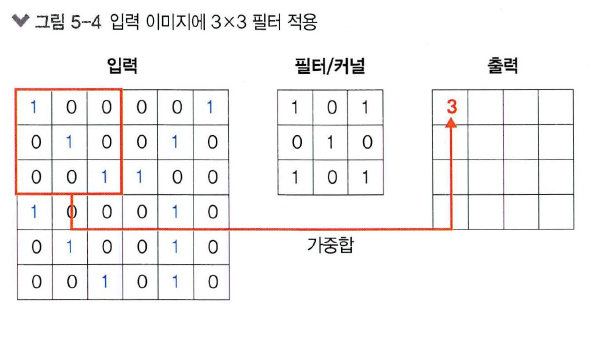

    2. 필터가 1만큼 이동

    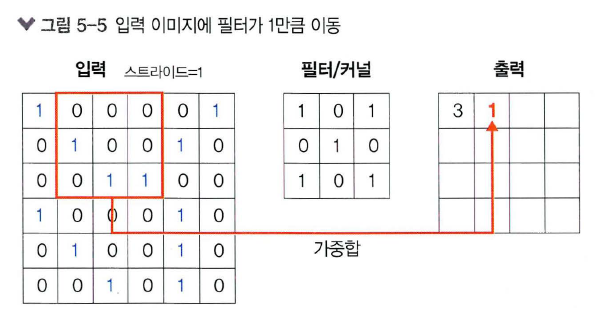

    3. 필터가 1만큼 두번째 이동

    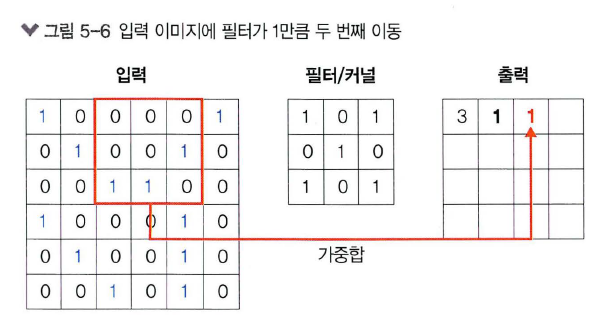

    .
    .
    .

    6. 필터가 1만큼 마지막으로 이동

    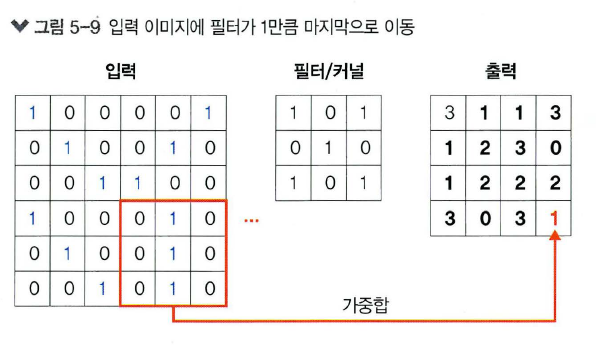



- 컬러 이미지 합성곱

    필터 채널이 3개(필터 개수는 3개가 아니라 1개임!!)

    RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후 결과를 더해 줌

    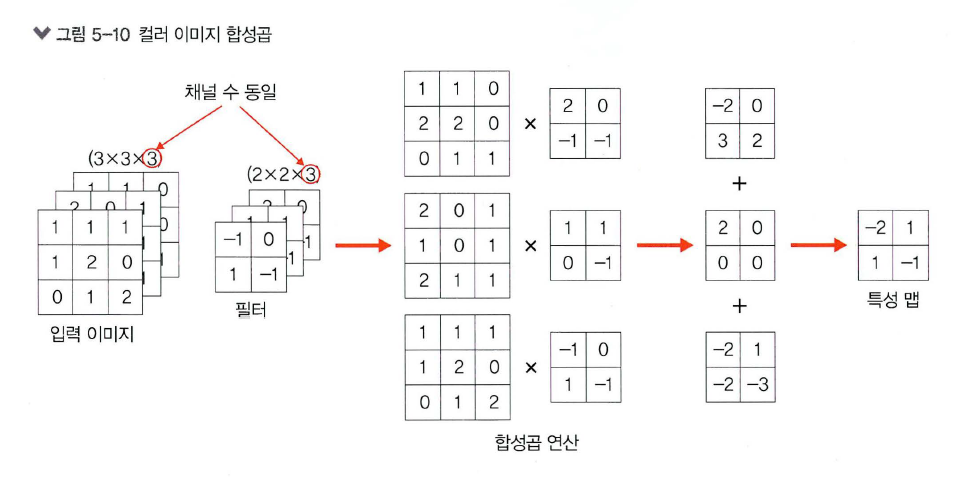

- 필터가 2개 이상인 합성곱

    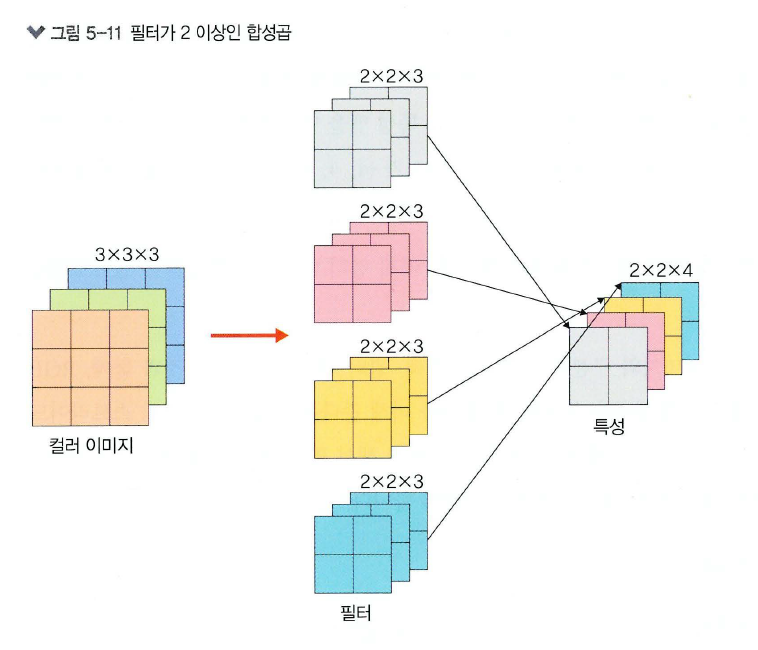

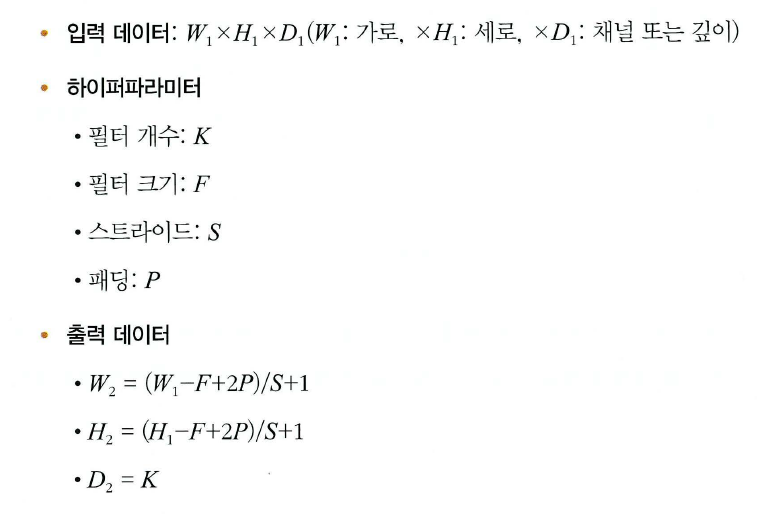

**풀링층**

합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 함

- 최대 풀링 : 대상 영역에서 최댓값 추출

- 평균 풀링 : 대상 영역에서 평균을 반환

평균 풀링은 각 커널 값을 평균화시켜 중요한 가중치를 갖는 값의 특성을 희미하게 하기 때문에 주로 최대 풀링을 사용함

ex) 최대 풀링 연산 과정

1. 첫 번째 최대 풀링 과정

    3, -1, -3, 1 값 중 최댓값(3) 선택

    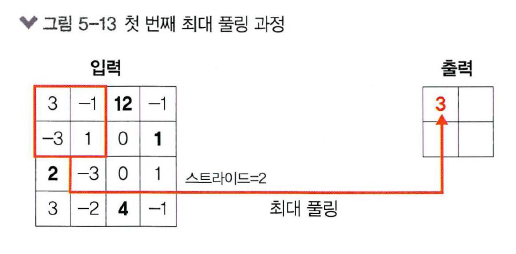

2. 두 번째 최대 풀링 과정

    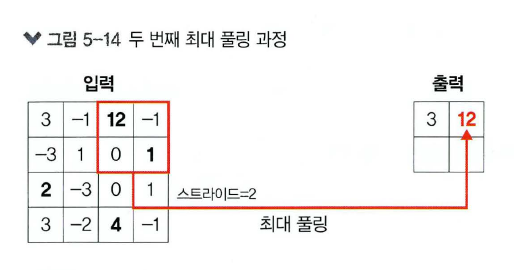

    .
    .
    .

4. 네 번쨰 최대 풀링 과정

    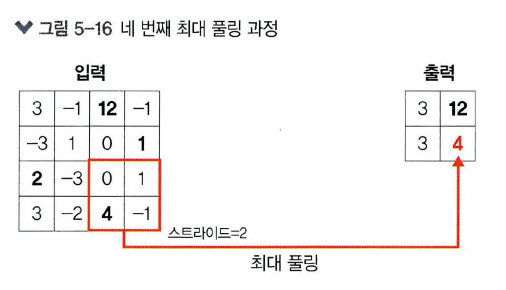

평균 풀링의 경우 값을 평균값으로 대체

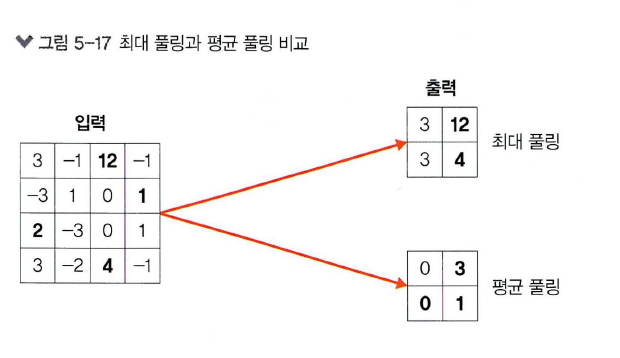

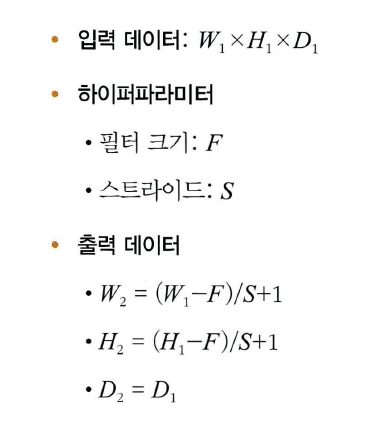

**완전연결층**

합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달됨

이 과정에서 이미지는 3차원 벡터에서 1차원 벡터로 펼쳐지게 됨

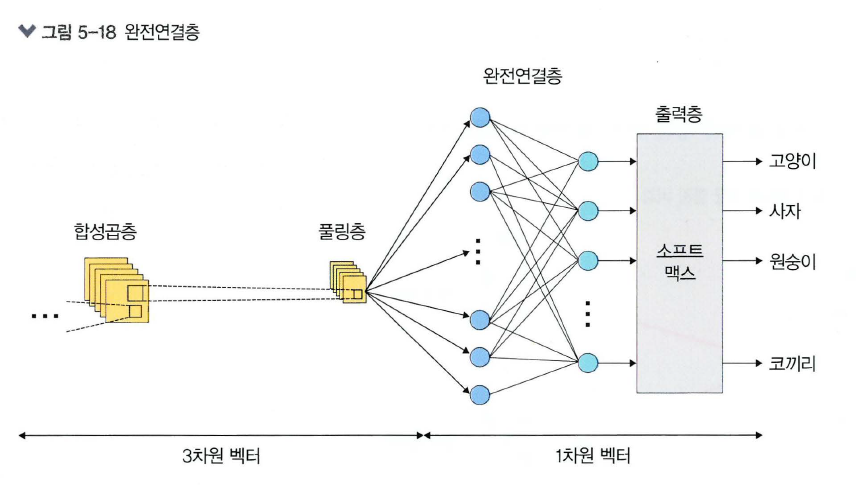

**출력층**

소프트맥스 활성화 함수 사용하여 입력 받은 값을 0~1 사이의 값으로 출력해줌

각 레이블에 속할 확률 값을 출력

가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정됨

## 5.1.3 1D, 2D, 3D 합성곱

**1D 합성곱**

필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱

입력(W)과 필터(k)에 대한 출력은 W가 됨

그래프 곡선을 완화할 때 많이 사용됨

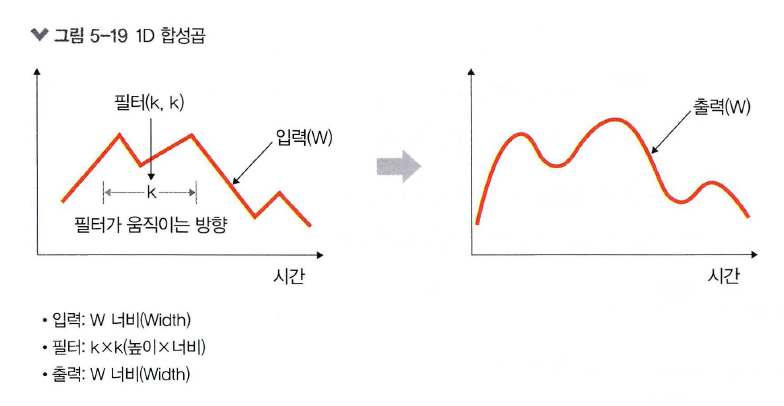

**2D 합성곱**

필터가 두 개의 방향으로 움직이는 형태

입력(W, H)과 필터(k, k)에 대한 출력은 (W, H)가 됨

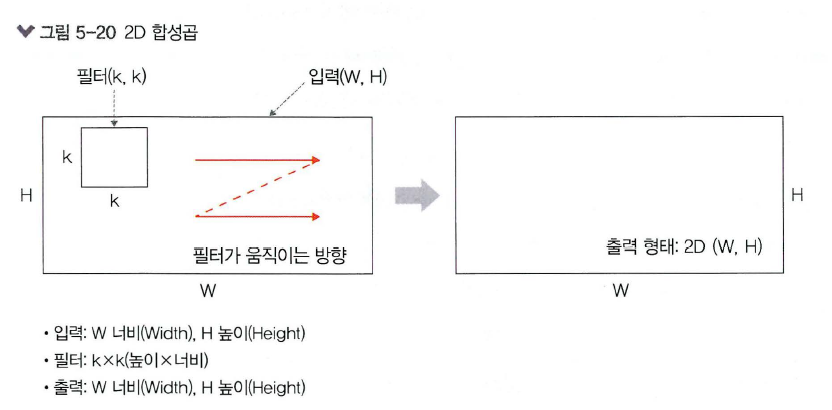

**3D 합성곱**

필터가 움직이는 방향이 세 개

입력(W, H, I)에 대해 필터(k, k, d)를 적용하면 출력으로 (W,H, I)을 가짐 * d < L을 유지해야함

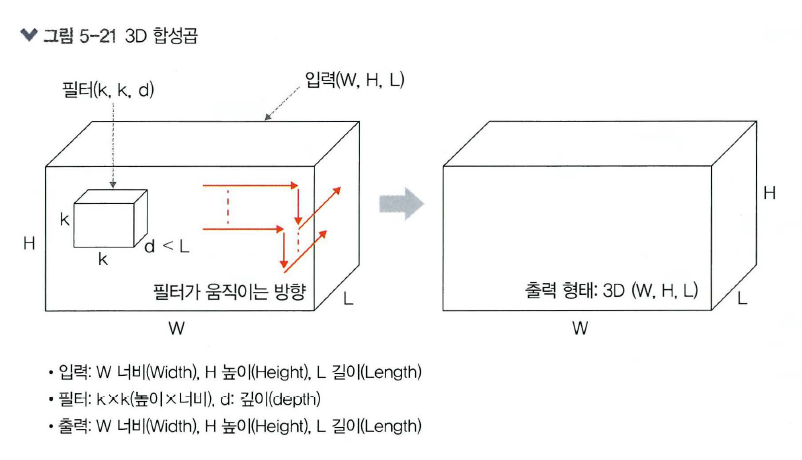

**3D 입력을 갖는 2D 합성곱**

입력이 3D 형태임에도 출력 형태가 2D 행렬을 취하는 것

필터에 대한 길이(L)가 입력 채널의 길이(L)와 같아야 하기 때문

입력(W, H, L)에 필터(k, k, L)를 적용하여 출력(W, H)이 됨

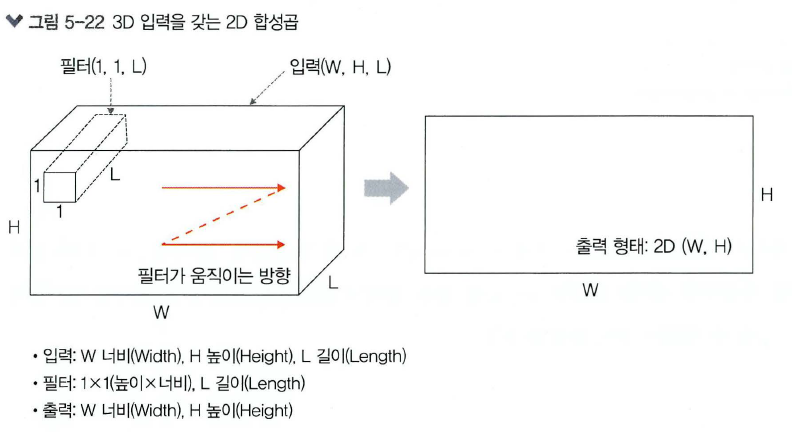

**1x1 합성곱**

입력(W, H, L)에 필터(1, 1, L)를 적용하여 출력(W, H)이 됨

채널 수를 조정하여 연산량을 감소시키는 효과가 있음

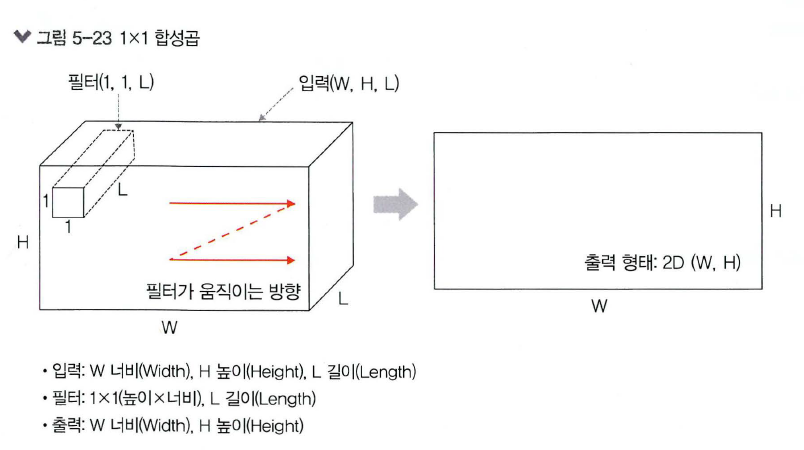